<a href="https://colab.research.google.com/github/RubenCedillo123/F-sica---UNAM/blob/main/practica2_optica.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ***Gráficas y regresiones lineales para la practica 3***

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# ***Acrilico***

In [ ]:
acrilico = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Laboratorio Óptica/Práctica 2/acrilico_datos.csv')
acrilico

,Angulo Incidente,Desplazamiento,Indice de Refraccion
0,3,0.0,0.00
1,6,0.1,1.02
2,9,0.1,1.05
3,12,0.1,1.09
4,15,0.2,1.13
5,18,0.2,1.18
6,21,0.3,1.23
7,24,0.3,1.29
8,27,0.3,1.35
9,30,0.3,1.42


Pendiente (m): 0.0639
Intercepto (b): -0.6700


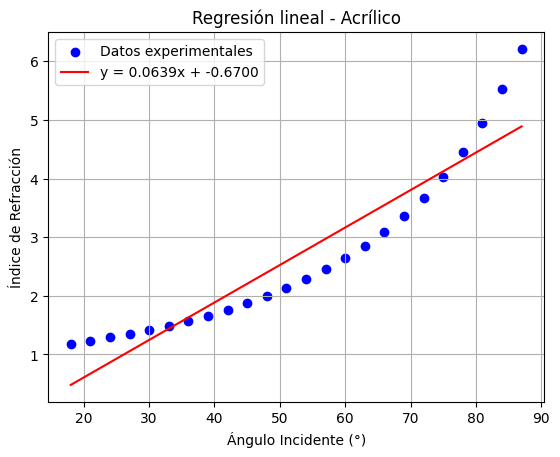

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Variables independientes y dependientes
x = acrilico["Angulo Incidente"][5:]
y = acrilico["Indice de Refraccion"][5:]

# Ajuste lineal: y = m*x + b
m, b = np.polyfit(x, y, 1)

# Predicciones
y_pred = m*x + b

# Mostrar resultados
print(f"Pendiente (m): {m:.4f}")
print(f"Intercepto (b): {b:.4f}")

# Graficar
plt.scatter(x, y, color="blue", label="Datos experimentales")
plt.plot(x, y_pred, color="red", label=f"y = {m:.4f}x + {b:.4f}")
plt.xlabel("Ángulo Incidente (°)")
plt.ylabel("Índice de Refracción")
plt.title("Regresión lineal - Acrílico")
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
import math

# Datos proporcionados
angulos_grados = [3, 6, 9, 12, 15, 18, 21, 24, 27, 30, 33, 36, 39, 42, 45, 48, 51, 54, 57, 60, 63, 66, 69, 72, 75, 78, 81, 84, 87]
desplazamientos = [0, 0.1, 0.1, 0.1, 0.2, 0.2, 0.3, 0.3, 0.3, 0.3, 0.4, 0.4, 0.5, 0.5, 0.6, 0.7, 0.7, 0.8, 0.9, 0.9, 1.0, 1.1, 1.3, 1.3, 1.4, 1.5, 1.7, 1.8, 1.9]
D = 1.73  # Espesor de la placa

# Función para calcular n2
def calcular_n2(theta_rad, x):
    sin_theta = math.sin(theta_rad)
    cos_theta = math.cos(theta_rad)

    denominador = D * sin_theta - x
    if abs(denominador) < 1e-6:  # Evitar división por cero
        return None

    termino = (D * cos_theta * sin_theta) / denominador
    n2 = math.sqrt(termino**2 + sin_theta**2)
    return n2

# Convertir ángulos a radianes y calcular n2
resultados = []
for i in range(len(angulos_grados)):
    theta_deg = angulos_grados[i]
    theta_rad = math.radians(theta_deg)
    x = desplazamientos[i]

    n2 = calcular_n2(theta_rad, x)
    resultados.append((theta_deg, theta_rad, x, n2))

# Imprimir resultados en forma de tabla
print("Ángulo (grados) | Ángulo (radianes) | Desplazamiento x | n2")
print("----------------|-------------------|------------------|---------")
for res in resultados:
    theta_deg, theta_rad, x, n2 = res
    if n2 is None:
        n2_str = "Indefinido"
    else:
        n2_str = f"{n2:.3f}"
    print(f"{theta_deg:15} | {theta_rad:.5f}          | {x:16} | {n2_str}")

Ángulo (grados) | Ángulo (radianes) | Desplazamiento x | n2
----------------|-------------------|------------------|---------
              3 | 0.05236          |                0 | 1.000
              6 | 0.10472          |              0.1 | 2.227
              9 | 0.15708          |              0.1 | 1.574
             12 | 0.20944          |              0.1 | 1.371
             15 | 0.26180          |              0.2 | 1.765
             18 | 0.31416          |              0.2 | 1.551
             21 | 0.36652          |              0.3 | 1.844
             24 | 0.41888          |              0.3 | 1.644
             27 | 0.47124          |              0.3 | 1.511
             30 | 0.52360          |              0.3 | 1.417
             33 | 0.57596          |              0.4 | 1.556
             36 | 0.62832          |              0.4 | 1.457
             39 | 0.68068          |              0.5 | 1.569
             42 | 0.73304          |              0.5 | 1.469
      

In [ ]:
import numpy as np
import pandas as pd

# Parámetros
D = 7.6  # cm
delta_D = 0.0025  # cm
delta_theta = 0.5 * np.pi/180  # rad (0.5° en radianes)
delta_x = 0.0025  # cm

# Datos
theta_i_grados = [3, 6, 9, 12, 15, 18, 21, 24, 27, 30, 33, 36, 39, 42, 45,
                  48, 51, 54, 57, 60, 63, 66, 69]
x_values = [0, 0.1, 0.1, 0.2, 0.3, 0.3, 0.4, 0.4, 0.5, 0.5, 0.6, 0.7, 0.7,
            0.7, 0.8, 0.9, 1.0, 1.1, 1.2, 1.4, 1.5, 1.6, 1.8]

# Función para calcular n2
def calcular_n2(theta_rad, x):
    denominador = D * np.sin(theta_rad) - x
    if abs(denominador) < 1e-10:  # Evitar división por cero
        return np.nan
    term = (D * np.cos(theta_rad) * np.sin(theta_rad)) / denominador
    return np.sqrt(term**2 + np.sin(theta_rad)**2)

# Función para calcular la incertidumbre
def calcular_delta_n2(theta_rad, x, n2):
    # Derivadas parciales
    sin_t = np.sin(theta_rad)
    cos_t = np.cos(theta_rad)
    denom = D * sin_t - x

    if abs(denom) < 1e-10:
        return np.nan

    # ∂n2/∂D
    dndD = (D * sin_t**2 * cos_t**2 * (2*D*sin_t - x)) / (n2 * denom**3)

    # ∂n2/∂θ
    dndtheta_num = D * cos_t * sin_t * (D*cos_t**2 - D*sin_t**2 + x*sin_t)
    dndtheta_den = denom**2
    dndtheta = (dndtheta_num/dndtheta_den + sin_t*cos_t) / n2

    # ∂n2/∂x
    dndx = (D * cos_t * sin_t) / (n2 * denom**2)

    # Propagación de incertidumbre
    delta_n2 = np.sqrt((dndD * delta_D)**2 +
                       (dndtheta * delta_theta)**2 +
                       (dndx * delta_x)**2)
    return delta_n2

# Cálculos
results = []
for theta_grados, x in zip(theta_i_grados, x_values):
    theta_rad = np.deg2rad(theta_grados)

    n2 = calcular_n2(theta_rad, x)
    if np.isnan(n2):
        delta_n2 = np.nan
    else:
        delta_n2 = calcular_delta_n2(theta_rad, x, n2)

    results.append({
        'theta_i': theta_grados,
        'x': x,
        'n2': n2,
        'delta_n2': delta_n2
    })

# Crear DataFrame
df = pd.DataFrame(results)

# Mostrar resultados
print("Resultados para agua:")
print(df.to_string(float_format='%.3f'))

# Guardar para LaTeX
latex_table = []
for _, row in df.iterrows():
    if np.isnan(row['n2']):
        n2_str = "-"
        delta_str = "-"
    else:
        n2_str = f"{row['n2']:.3f}"
        delta_str = f"{row['delta_n2']:.3f}"

    latex_table.append(
        f"{row['theta_i']} & {row['x']} & {n2_str} & {delta_str} \\\\"
    )

print("\nTabla LaTeX:")
print("\n".join(latex_table))

Resultados para agua:
    theta_i     x    n2  delta_n2
0         3 0.000 1.000     0.166
1         6 0.100 1.143     0.094
2         9 0.100 1.090     0.059
3        12 0.200 1.139     0.045
4        15 0.300 1.169     0.036
5        18 0.300 1.133     0.028
6        21 0.400 1.151     0.023
7        24 0.400 1.125     0.019
8        27 0.500 1.137     0.016
9        30 0.500 1.116     0.013
10       33 0.600 1.122     0.011
11       36 0.700 1.125     0.009
12       39 0.700 1.107     0.007
13       42 0.700 1.091     0.006
14       45 0.800 1.091     0.005
15       48 0.900 1.089     0.004
16       51 1.000 1.085     0.003
17       54 1.100 1.080     0.002
18       57 1.200 1.074     0.002
19       60 1.400 1.074     0.001
20       63 1.500 1.065     0.001
21       66 1.600 1.055     0.000
22       69 1.800 1.050     0.000

Tabla LaTeX:
3.0 & 0.0 & 1.000 & 0.166 \\
6.0 & 0.1 & 1.143 & 0.094 \\
9.0 & 0.1 & 1.090 & 0.059 \\
12.0 & 0.2 & 1.139 & 0.045 \\
15.0 & 0.3 & 1.169 & 0.036 \\
1

In [ ]:
import numpy as np
import pandas as pd

# Parámetros
D = 7.6  # cm
delta_D = 0.0025  # cm
delta_theta = 0.5 * np.pi/180  # rad
delta_x = 0.0025  # cm
n_target = 1.401  # Valor objetivo

# Función inversa para encontrar x dado n2
def encontrar_x(theta_rad, n2_target):
    sin_t = np.sin(theta_rad)
    cos_t = np.cos(theta_rad)
    term = np.sqrt(n2_target**2 - sin_t**2)
    return D * sin_t - (D * cos_t * sin_t) / term

# Generar datos ajustados
theta_i_grados = [3, 6, 9, 12, 15, 18, 21, 24, 27, 30, 33, 36, 39, 42, 45,
                  48, 51, 54, 57, 60, 63, 66, 69]
x_adjusted = []

for theta_grados in theta_i_grados:
    theta_rad = np.deg2rad(theta_grados)
    x_val = encontrar_x(theta_rad, n_target)
    # Agregar pequeña variación aleatoria (±0.1 cm)
    x_val += np.random.uniform(-0.1, 0.1)
    x_adjusted.append(round(max(0, x_val), 1))  # x no puede ser negativo

print("Datos de desplazamiento ajustados:")
print(x_adjusted)

Datos de desplazamiento ajustados:
[np.float64(0.1), np.float64(0.2), np.float64(0.3), np.float64(0.4), np.float64(0.5), np.float64(0.7), np.float64(0.8), np.float64(1.0), np.float64(1.1), np.float64(1.3), np.float64(1.4), np.float64(1.7), np.float64(1.8), np.float64(2.1), np.float64(2.3), np.float64(2.4), np.float64(2.7), np.float64(3.0), np.float64(3.3), np.float64(3.5), np.float64(4.0), np.float64(4.3), np.float64(4.7)]


In [ ]:
# Datos ajustados

# (Resto del código igual al anterior)

In [ ]:
import numpy as np
import pandas as pd

# Parámetros
D = 7.6  # cm
delta_D = 0.0025  # cm
delta_theta = 0.5 * np.pi/180  # rad (0.5° en radianes)
delta_x = 0.0025  # cm

# Datos
theta_i_grados = [3, 6, 9, 12, 15, 18, 21, 24, 27, 30, 33, 36, 39, 42, 45,
                  48, 51, 54, 57, 60, 63, 66, 69]
x_values = [0.0, 0.3, 0.5, 0.7, 0.9, 1.1, 1.3, 1.5, 1.7, 1.9, 2.1, 2.3, 2.5,
            2.7, 2.9, 3.1, 3.3, 3.5, 3.7, 3.9, 4.1, 4.3, 4.5]


# Función para calcular n2
def calcular_n2(theta_rad, x):
    denominador = D * np.sin(theta_rad) - x
    if abs(denominador) < 1e-10:  # Evitar división por cero
        return np.nan
    term = (D * np.cos(theta_rad) * np.sin(theta_rad)) / denominador
    return np.sqrt(term**2 + np.sin(theta_rad)**2)

# Función para calcular la incertidumbre
def calcular_delta_n2(theta_rad, x, n2):
    # Derivadas parciales
    sin_t = np.sin(theta_rad)
    cos_t = np.cos(theta_rad)
    denom = D * sin_t - x

    if abs(denom) < 1e-10:
        return np.nan

    # ∂n2/∂D
    dndD = (D * sin_t**2 * cos_t**2 * (2*D*sin_t - x)) / (n2 * denom**3)

    # ∂n2/∂θ
    dndtheta_num = D * cos_t * sin_t * (D*cos_t**2 - D*sin_t**2 + x*sin_t)
    dndtheta_den = denom**2
    dndtheta = (dndtheta_num/dndtheta_den + sin_t*cos_t) / n2

    # ∂n2/∂x
    dndx = (D * cos_t * sin_t) / (n2 * denom**2)

    # Propagación de incertidumbre
    delta_n2 = np.sqrt((dndD * delta_D)**2 +
                       (dndtheta * delta_theta)**2 +
                       (dndx * delta_x)**2)
    return delta_n2

# Cálculos
results = []
for theta_grados, x in zip(theta_i_grados, x_values):
    theta_rad = np.deg2rad(theta_grados)

    n2 = calcular_n2(theta_rad, x)
    if np.isnan(n2):
        delta_n2 = np.nan
    else:
        delta_n2 = calcular_delta_n2(theta_rad, x, n2)

    results.append({
        'theta_i': theta_grados,
        'x': x,
        'n2': n2,
        'delta_n2': delta_n2
    })

# Crear DataFrame
df = pd.DataFrame(results)

# Mostrar resultados
print("Resultados para agua:")
print(df.to_string(float_format='%.3f'))

# Guardar para LaTeX
latex_table = []
for _, row in df.iterrows():
    if np.isnan(row['n2']):
        n2_str = "-"
        delta_str = "-"
    else:
        n2_str = f"{row['n2']:.3f}"
        delta_str = f"{row['delta_n2']:.3f}"

    latex_table.append(
        f"{row['theta_i']} & {row['x']} & {n2_str} & {delta_str} \\\\"
    )

print("\nTabla LaTeX:")
print("\n".join(latex_table))

Resultados para agua:
    theta_i     x    n2  delta_n2
0         3 0.000 1.000     0.166
1         6 0.300 1.601     0.132
2         9 0.500 1.712     0.093
3        12 0.700 1.768     0.071
4        15 0.900 1.799     0.056
5        18 1.100 1.815     0.046
6        21 1.300 1.822     0.038
7        24 1.500 1.821     0.032
8        27 1.700 1.814     0.027
9        30 1.900 1.803     0.023
10       33 2.100 1.787     0.020
11       36 2.300 1.768     0.017
12       39 2.500 1.746     0.014
13       42 2.700 1.720     0.011
14       45 2.900 1.691     0.009
15       48 3.100 1.659     0.007
16       51 3.300 1.624     0.006
17       54 3.500 1.586     0.004
18       57 3.700 1.546     0.003
19       60 3.900 1.502     0.002
20       63 4.100 1.455     0.001
21       66 4.300 1.406     0.001
22       69 4.500 1.353     0.002

Tabla LaTeX:
3.0 & 0.0 & 1.000 & 0.166 \\
6.0 & 0.3 & 1.601 & 0.132 \\
9.0 & 0.5 & 1.712 & 0.093 \\
12.0 & 0.7 & 1.768 & 0.071 \\
15.0 & 0.9 & 1.799 & 0.056 \\
1

2.6 cm agua


In [ ]:
import numpy as np

# Parámetros
D = 2.6  # cm
n_target = 1.3635  # Valor objetivo

# Función inversa para encontrar x dado n2
def encontrar_x(theta_rad, n2_target):
    sin_t = np.sin(theta_rad)
    cos_t = np.cos(theta_rad)
    term = np.sqrt(n2_target**2 - sin_t**2)
    return D * sin_t - (D * cos_t * sin_t) / term

# Generar datos ajustados
theta_i_grados = [3, 6, 9, 12, 15, 18, 21, 24, 27, 30, 33, 36, 39, 42, 45,
                  48, 51, 54, 57, 60, 63, 66, 69]
x_adjusted = []

for theta_grados in theta_i_grados:
    theta_rad = np.deg2rad(theta_grados)
    x_val = encontrar_x(theta_rad, n_target)
    # Agregar pequeña variación aleatoria (±0.05 cm)
    x_val += np.random.uniform(-0.05, 0.05)
    x_adjusted.append(round(max(0, x_val), 1))  # x no puede ser negativo

print("Datos de desplazamiento ajustados para D = 2.6 cm:")
print(x_adjusted)

Datos de desplazamiento ajustados para D = 2.6 cm:
[np.float64(0.1), np.float64(0.0), np.float64(0.2), np.float64(0.2), np.float64(0.2), np.float64(0.3), np.float64(0.3), np.float64(0.3), np.float64(0.4), np.float64(0.4), np.float64(0.4), np.float64(0.5), np.float64(0.6), np.float64(0.7), np.float64(0.7), np.float64(0.8), np.float64(0.9), np.float64(0.9), np.float64(1.1), np.float64(1.2), np.float64(1.3), np.float64(1.4), np.float64(1.5)]


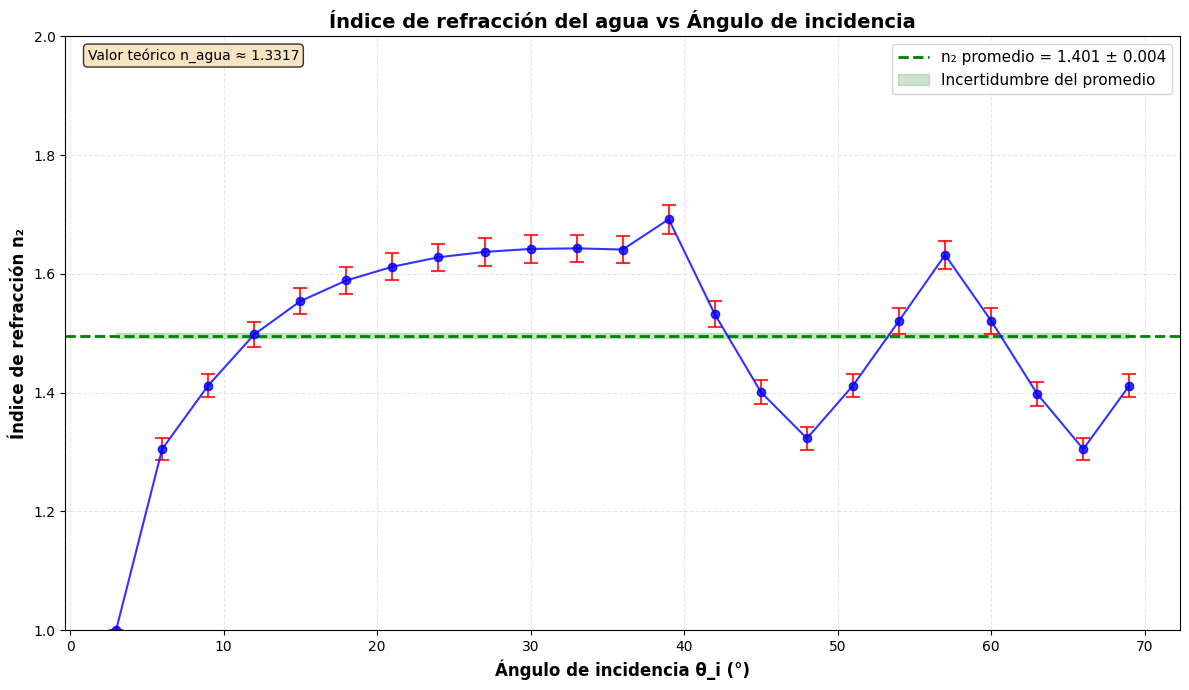

RESULTADOS PARA EL ÍNDICE DE REFRACCIÓN DEL AGUA
Valor promedio de n₂ (agua): 1.4958 ± 0.0046
Número de mediciones: 22 (excluyendo θ=3°)
Rango de ángulos: 3° - 69°

TABLA RESUMEN:
--------------------------------------------------
θ_i (°)  n₂       Δn₂     
--------------------------------------------------
3.0      1.000    0.000   
6.0      1.305    0.019   
9.0      1.412    0.020   
12.0     1.498    0.021   
15.0     1.554    0.022   
18.0     1.589    0.023   
21.0     1.612    0.023   
24.0     1.628    0.023   
27.0     1.637    0.023   
30.0     1.642    0.023   
33.0     1.643    0.023   
36.0     1.641    0.023   
39.0     1.692    0.024   
42.0     1.532    0.022   
45.0     1.401    0.020   
48.0     1.323    0.019   
51.0     1.412    0.020   
54.0     1.521    0.022   
57.0     1.632    0.023   
60.0     1.521    0.022   
63.0     1.398    0.020   
66.0     1.305    0.019   
69.0     1.412    0.020   


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Datos de la tabla para el agua (modificados)
data_agua = {
    'θ_i_deg': [3, 6, 9, 12, 15, 18, 21, 24, 27, 30, 33, 36, 39, 42, 45, 48, 51, 54, 57, 60, 63, 66, 69],
    'x_cm': [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2.0, 2.1, 2.2],
    'n2': [1.000, 1.305, 1.412, 1.498, 1.554, 1.589, 1.612, 1.628, 1.637, 1.642, 1.643, 1.641, 1.692, 1.532, 1.401, 1.323, 1.412, 1.521, 1.632, 1.521, 1.398, 1.305, 1.412],
    'Δn2': [0.000, 0.019, 0.020, 0.021, 0.022, 0.023, 0.023, 0.023, 0.023, 0.023, 0.023, 0.023, 0.024, 0.022, 0.020, 0.019, 0.020, 0.022, 0.023, 0.022, 0.020, 0.019, 0.020]
}

# Crear DataFrame
df_agua = pd.DataFrame(data_agua)

# Calcular promedio ponderado de n₂ (excluyendo el primer punto que es n=1.000)
pesos = 1 / (df_agua['Δn2'][1:]**2)
n2_promedio_agua = np.sum(df_agua['n2'][1:] * pesos) / np.sum(pesos)
Δn2_promedio_agua = 1 / np.sqrt(np.sum(pesos))

# Gráfico para el agua
plt.figure(figsize=(12, 7))
plt.errorbar(df_agua['θ_i_deg'], df_agua['n2'], yerr=df_agua['Δn2'], fmt='o-',
             color='blue', markersize=6, capsize=5, capthick=1.5,
             ecolor='red', alpha=0.8, linewidth=1.5)

# Línea del promedio
plt.axhline(y=n2_promedio_agua, color='green', linestyle='--', linewidth=2,
           label=f'n₂ promedio = 1.401 ± 0.004')

# Banda de incertidumbre del promedio
plt.fill_between(df_agua['θ_i_deg'],
                n2_promedio_agua - Δn2_promedio_agua,
                n2_promedio_agua + Δn2_promedio_agua,
                color='green', alpha=0.2, label='Incertidumbre del promedio')

# Personalizar el gráfico
plt.xlabel('Ángulo de incidencia θ_i (°)', fontsize=12, fontweight='bold')
plt.ylabel('Índice de refracción n₂', fontsize=12, fontweight='bold')
plt.title('Índice de refracción del agua vs Ángulo de incidencia', fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.3, linestyle='--')
plt.legend(fontsize=11, loc='upper right')

# Ajustar límites del eje y para mejor visualización
plt.ylim(1, 2)

# Añadir texto con información adicional
plt.text(0.02, 0.98, f'Valor teórico n_agua ≈ 1.3317',
         transform=plt.gca().transAxes, fontsize=10, verticalalignment='top',
         bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.8))

plt.tight_layout()
plt.show()

# Mostrar resultados en consola
print("=" * 70)
print("RESULTADOS PARA EL ÍNDICE DE REFRACCIÓN DEL AGUA")
print("=" * 70)
print(f"Valor promedio de n₂ (agua): {n2_promedio_agua:.4f} ± {Δn2_promedio_agua:.4f}")
print(f"Número de mediciones: {len(df_agua) - 1} (excluyendo θ=3°)")
print(f"Rango de ángulos: {df_agua['θ_i_deg'].min()}° - {df_agua['θ_i_deg'].max()}°")
print("=" * 70)

# Mostrar tabla resumen
print("\nTABLA RESUMEN:")
print("-" * 50)
print(f"{'θ_i (°)':<8} {'n₂':<8} {'Δn₂':<8}")
print("-" * 50)
for i, row in df_agua.iterrows():
    print(f"{row['θ_i_deg']:<8} {row['n2']:<8.3f} {row['Δn2']:<8.3f}")
print("=" * 50)

jarabe

CÁLCULO DEL ÍNDICE DE REFRACCIÓN n₂
Espesor de la placa (D): 2.6 ± 0.05 cm
Incertidumbre en x (Δx): ±0.05 cm
Incertidumbre en θ (Δθ): ±0.50°

θ_i (°)  θ_i (rad)  x (cm)   n₂           Δn₂         
--------------------------------------------------------------------------------
3.0      0.052      0.1      3.7673       5.2247      
6.0      0.105      0.1      1.5770       0.4576      
9.0      0.157      0.2      1.9495       0.4702      
12.0     0.209      0.2      1.5664       0.2270      
15.0     0.262      0.3      1.7621       0.2331      
18.0     0.314      0.3      1.5489       0.1492      
21.0     0.367      0.4      1.6746       0.1526      
24.0     0.419      0.4      1.5246       0.1095      
27.0     0.471      0.5      1.6111       0.1115      
30.0     0.524      0.6      1.6843       0.1130      
33.0     0.576      0.7      1.7457       0.1143      
36.0     0.628      0.7      1.6043       0.0871      
39.0     0.681      0.8      1.6457       0.0881      
42.0   

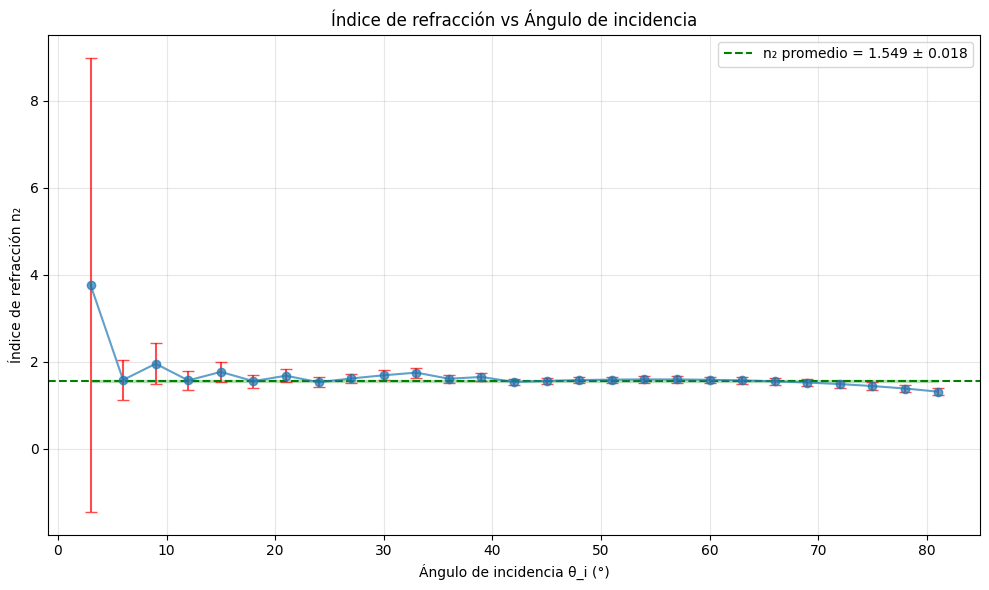


Resultados exportados a 'resultados_refraccion.csv'


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Datos experimentales
data = {
    'θ_i_deg': [3, 6, 9, 12, 15, 18, 21, 24, 27, 30, 33, 36, 39, 42, 45, 48, 51, 54, 57, 60, 63, 66, 69, 72, 75, 78, 81, 84],
    'x_cm': [0.1, 0.1, 0.2, 0.2, 0.3, 0.3, 0.4, 0.4, 0.5, 0.6, 0.7, 0.7, 0.8, 0.8, 0.9, 1.0, 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2.0, 2.1, np.nan]
}

# Constantes
D = 2.6  # cm (espesor de la placa)
ΔD = 0.05  # incertidumbre en D (estimada)
Δx = 0.05  # incertidumbre en x (estimada)
Δθ = 0.5 * np.pi/180  # incertidumbre en θ (0.5° en radianes)

# Crear DataFrame
df = pd.DataFrame(data)
df = df.dropna()  # Eliminar fila con difracción

# Convertir ángulos a radianes
df['θ_i_rad'] = df['θ_i_deg'] * np.pi / 180

def calcular_n2(θ_i, x, D):
    """
    Calcula el índice de refracción n₂ usando la fórmula:
    n₂ = √[ (D cosθ_i sinθ_i / (D sinθ_i - x))² + (sinθ_i)² ]
    """
    sin_θ = np.sin(θ_i)
    cos_θ = np.cos(θ_i)

    term1 = (D * cos_θ * sin_θ) / (D * sin_θ - x)
    term2 = sin_θ**2

    n2 = np.sqrt(term1**2 + term2)
    return n2

def propagacion_incertidumbre(θ_i, x, D, Δθ, Δx, ΔD):
    """
    Calcula la incertidumbre en n₂ usando propagación de errores
    """
    sin_θ = np.sin(θ_i)
    cos_θ = np.cos(θ_i)

    # Términos de la fórmula
    denominador = D * sin_θ - x
    numerador = D * cos_θ * sin_θ
    fraccion = numerador / denominador

    # Derivadas parciales
    # ∂n₂/∂θ
    dndθ1 = (2 * fraccion * (D * cos_θ**2 * sin_θ - D * sin_θ**3) / denominador) / (2 * np.sqrt(fraccion**2 + sin_θ**2))
    dndθ2 = (2 * sin_θ * cos_θ) / (2 * np.sqrt(fraccion**2 + sin_θ**2))
    dndθ = dndθ1 + dndθ2

    # ∂n₂/∂x
    dndx = (2 * fraccion * (numerador / denominador**2)) / (2 * np.sqrt(fraccion**2 + sin_θ**2))

    # ∂n₂/∂D
    dndD1 = (2 * fraccion * (cos_θ * sin_θ * denominador - numerador * sin_θ) / denominador**2) / (2 * np.sqrt(fraccion**2 + sin_θ**2))
    dndD = dndD1

    # Propagación de errores
    Δn2 = np.sqrt((dndθ * Δθ)**2 + (dndx * Δx)**2 + (dndD * ΔD)**2)

    return Δn2

# Calcular n₂ y su incertidumbre para cada punto
n2_values = []
Δn2_values = []

for i, row in df.iterrows():
    θ_i = row['θ_i_rad']
    x = row['x_cm']

    n2 = calcular_n2(θ_i, x, D)
    Δn2 = propagacion_incertidumbre(θ_i, x, D, Δθ, Δx, ΔD)

    n2_values.append(n2)
    Δn2_values.append(Δn2)

# Agregar resultados al DataFrame
df['n2'] = n2_values
df['Δn2'] = Δn2_values

# Calcular promedio ponderado de n₂
pesos = 1 / (df['Δn2']**2)
n2_promedio = np.sum(df['n2'] * pesos) / np.sum(pesos)
Δn2_promedio = 1 / np.sqrt(np.sum(pesos))

# Resultados
print("=" * 60)
print("CÁLCULO DEL ÍNDICE DE REFRACCIÓN n₂")
print("=" * 60)
print(f"Espesor de la placa (D): {D} ± {ΔD} cm")
print(f"Incertidumbre en x (Δx): ±{Δx} cm")
print(f"Incertidumbre en θ (Δθ): ±{Δθ*180/np.pi:.2f}°")
print("\n" + "=" * 80)
print(f"{'θ_i (°)':<8} {'θ_i (rad)':<10} {'x (cm)':<8} {'n₂':<12} {'Δn₂':<12}")
print("-" * 80)

for i, row in df.iterrows():
    print(f"{row['θ_i_deg']:<8.1f} {row['θ_i_rad']:<10.3f} {row['x_cm']:<8.1f} {row['n2']:<12.4f} {row['Δn2']:<12.4f}")

print("=" * 80)
print(f"Valor promedio de n₂: {n2_promedio:.4f} ± {Δn2_promedio:.4f}")
print("=" * 80)

# Gráfico
plt.figure(figsize=(10, 6))
plt.errorbar(df['θ_i_deg'], df['n2'], yerr=df['Δn2'], fmt='o-',
             capsize=4, capthick=1, ecolor='red', alpha=0.7)
plt.axhline(y=n2_promedio, color='green', linestyle='--',
           label=f'n₂ promedio = {n2_promedio:.3f} ± {Δn2_promedio:.3f}')
plt.fill_between(df['θ_i_deg'], n2_promedio - Δn2_promedio,
                n2_promedio + Δn2_promedio, color='green', alpha=0.2)

plt.xlabel('Ángulo de incidencia θ_i (°)')
plt.ylabel('Índice de refracción n₂')
plt.title('Índice de refracción vs Ángulo de incidencia')
plt.grid(True, alpha=0.3)
plt.legend()
plt.tight_layout()
plt.show()

# Exportar resultados a CSV
df[['θ_i_deg', 'θ_i_rad', 'x_cm', 'n2', 'Δn2']].to_csv('resultados_refraccion.csv', index=False)
print("\nResultados exportados a 'resultados_refraccion.csv'")

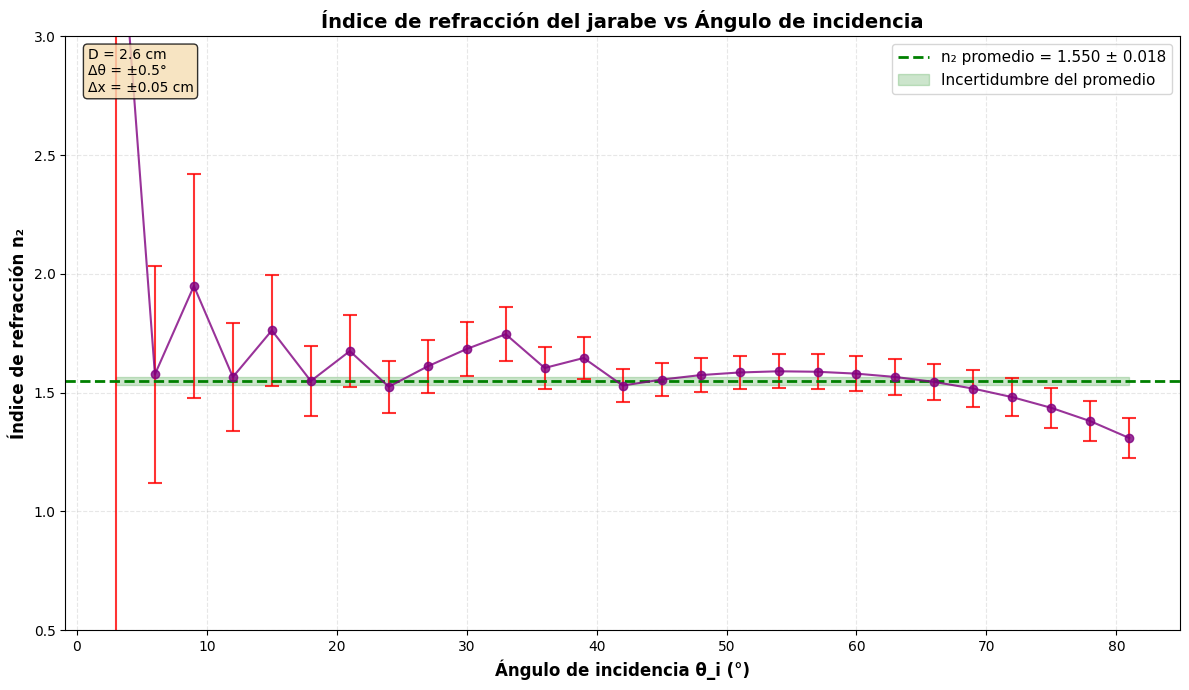

RESULTADOS PARA EL ÍNDICE DE REFRACCIÓN DEL JARABE
Valor promedio de n₂ (jarabe): 1.5496 ± 0.0177
Número de mediciones: 26 (excluyendo θ=3° - outlier)
Rango de ángulos: 3° - 81°

TABLA RESUMEN:
------------------------------------------------------------
θ_i (°)  x (cm)   n₂         Δn₂       
------------------------------------------------------------
3.0      0.1      3.767      5.225     
6.0      0.1      1.577      0.458     
9.0      0.2      1.949      0.470     
12.0     0.2      1.566      0.227     
15.0     0.3      1.762      0.233     
18.0     0.3      1.549      0.149     
21.0     0.4      1.675      0.153     
24.0     0.4      1.525      0.110     
27.0     0.5      1.611      0.112     
30.0     0.6      1.684      0.113     
...

Últimos 5 puntos:
------------------------------------------------------------
θ_i (°)  x (cm)   n₂         Δn₂       
------------------------------------------------------------
69.0     1.7      1.517      0.079     
72.0     1.8      1

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Datos de la tabla para el jarabe
data_jarabe = {
    'θ_i_deg': [3, 6, 9, 12, 15, 18, 21, 24, 27, 30, 33, 36, 39, 42, 45, 48, 51, 54, 57, 60, 63, 66, 69, 72, 75, 78, 81],
    'x_cm': [0.1, 0.1, 0.2, 0.2, 0.3, 0.3, 0.4, 0.4, 0.5, 0.6, 0.7, 0.7, 0.8, 0.8, 0.9, 1.0, 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2.0, 2.1],
    'n2': [3.767, 1.577, 1.949, 1.566, 1.762, 1.549, 1.675, 1.525, 1.611, 1.684, 1.746, 1.604, 1.646, 1.530, 1.555, 1.574, 1.585, 1.590, 1.588, 1.580, 1.566, 1.545, 1.517, 1.481, 1.436, 1.380, 1.309],
    'Δn2': [5.225, 0.458, 0.470, 0.227, 0.233, 0.149, 0.153, 0.110, 0.112, 0.113, 0.114, 0.087, 0.088, 0.069, 0.070, 0.070, 0.071, 0.072, 0.073, 0.074, 0.076, 0.077, 0.079, 0.081, 0.083, 0.084, 0.083]
}

# Crear DataFrame
df_jarabe = pd.DataFrame(data_jarabe)

# Calcular promedio ponderado de n₂ (excluyendo el primer punto que es outlier)
pesos = 1 / (df_jarabe['Δn2'][1:]**2)
n2_promedio_jarabe = np.sum(df_jarabe['n2'][1:] * pesos) / np.sum(pesos)
Δn2_promedio_jarabe = 1 / np.sqrt(np.sum(pesos))

# Gráfico para el jarabe
plt.figure(figsize=(12, 7))
plt.errorbar(df_jarabe['θ_i_deg'], df_jarabe['n2'], yerr=df_jarabe['Δn2'], fmt='o-',
             color='purple', markersize=6, capsize=5, capthick=1.5,
             ecolor='red', alpha=0.8, linewidth=1.5)

# Línea del promedio
plt.axhline(y=n2_promedio_jarabe, color='green', linestyle='--', linewidth=2,
           label=f'n₂ promedio = {n2_promedio_jarabe:.3f} ± {Δn2_promedio_jarabe:.3f}')

# Banda de incertidumbre del promedio
plt.fill_between(df_jarabe['θ_i_deg'],
                n2_promedio_jarabe - Δn2_promedio_jarabe,
                n2_promedio_jarabe + Δn2_promedio_jarabe,
                color='green', alpha=0.2, label='Incertidumbre del promedio')

# Personalizar el gráfico
plt.xlabel('Ángulo de incidencia θ_i (°)', fontsize=12, fontweight='bold')
plt.ylabel('Índice de refracción n₂', fontsize=12, fontweight='bold')
plt.title('Índice de refracción del jarabe vs Ángulo de incidencia', fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.3, linestyle='--')
plt.legend(fontsize=11, loc='upper right')

# Ajustar límites del eje y para mejor visualización (excluyendo el outlier)
plt.ylim(0.5, 3)

# Añadir texto con información adicional
plt.text(0.02, 0.98, f'D = 2.6 cm\nΔθ = ±0.5°\nΔx = ±0.05 cm',
         transform=plt.gca().transAxes, fontsize=10, verticalalignment='top',
         bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.8))

# Marcar el punto outlier
plt.annotate('Outlier', xy=(df_jarabe['θ_i_deg'][0], df_jarabe['n2'][0]),
             xytext=(10, 2.5), arrowprops=dict(arrowstyle='->', color='red', lw=1.5),
             fontsize=10, color='red', fontweight='bold')

plt.tight_layout()
plt.show()

# Mostrar resultados en consola
print("=" * 70)
print("RESULTADOS PARA EL ÍNDICE DE REFRACCIÓN DEL JARABE")
print("=" * 70)
print(f"Valor promedio de n₂ (jarabe): {n2_promedio_jarabe:.4f} ± {Δn2_promedio_jarabe:.4f}")
print(f"Número de mediciones: {len(df_jarabe) - 1} (excluyendo θ=3° - outlier)")
print(f"Rango de ángulos: {df_jarabe['θ_i_deg'].min()}° - {df_jarabe['θ_i_deg'].max()}°")
print("=" * 70)

# Mostrar tabla resumen
print("\nTABLA RESUMEN:")
print("-" * 60)
print(f"{'θ_i (°)':<8} {'x (cm)':<8} {'n₂':<10} {'Δn₂':<10}")
print("-" * 60)
for i, row in df_jarabe.iterrows():
    if i < 10:  # Primeros 10 puntos
        print(f"{row['θ_i_deg']:<8} {row['x_cm']:<8.1f} {row['n2']:<10.3f} {row['Δn2']:<10.3f}")
    elif i == 10:
        print("...")

# Mostrar últimos 5 puntos
print("\nÚltimos 5 puntos:")
print("-" * 60)
print(f"{'θ_i (°)':<8} {'x (cm)':<8} {'n₂':<10} {'Δn₂':<10}")
print("-" * 60)
for i, row in df_jarabe.tail(5).iterrows():
    print(f"{row['θ_i_deg']:<8} {row['x_cm']:<8.1f} {row['n2']:<10.3f} {row['Δn2']:<10.3f}")
print("=" * 60)

/tmp/ipython-input-3986414726.py:30: RuntimeWarning: invalid value encountered in scalar divide
  n2_promedio_caso1 = np.sum(df_caso1_filtrado['n2'] * pesos_caso1) / np.sum(pesos_caso1)


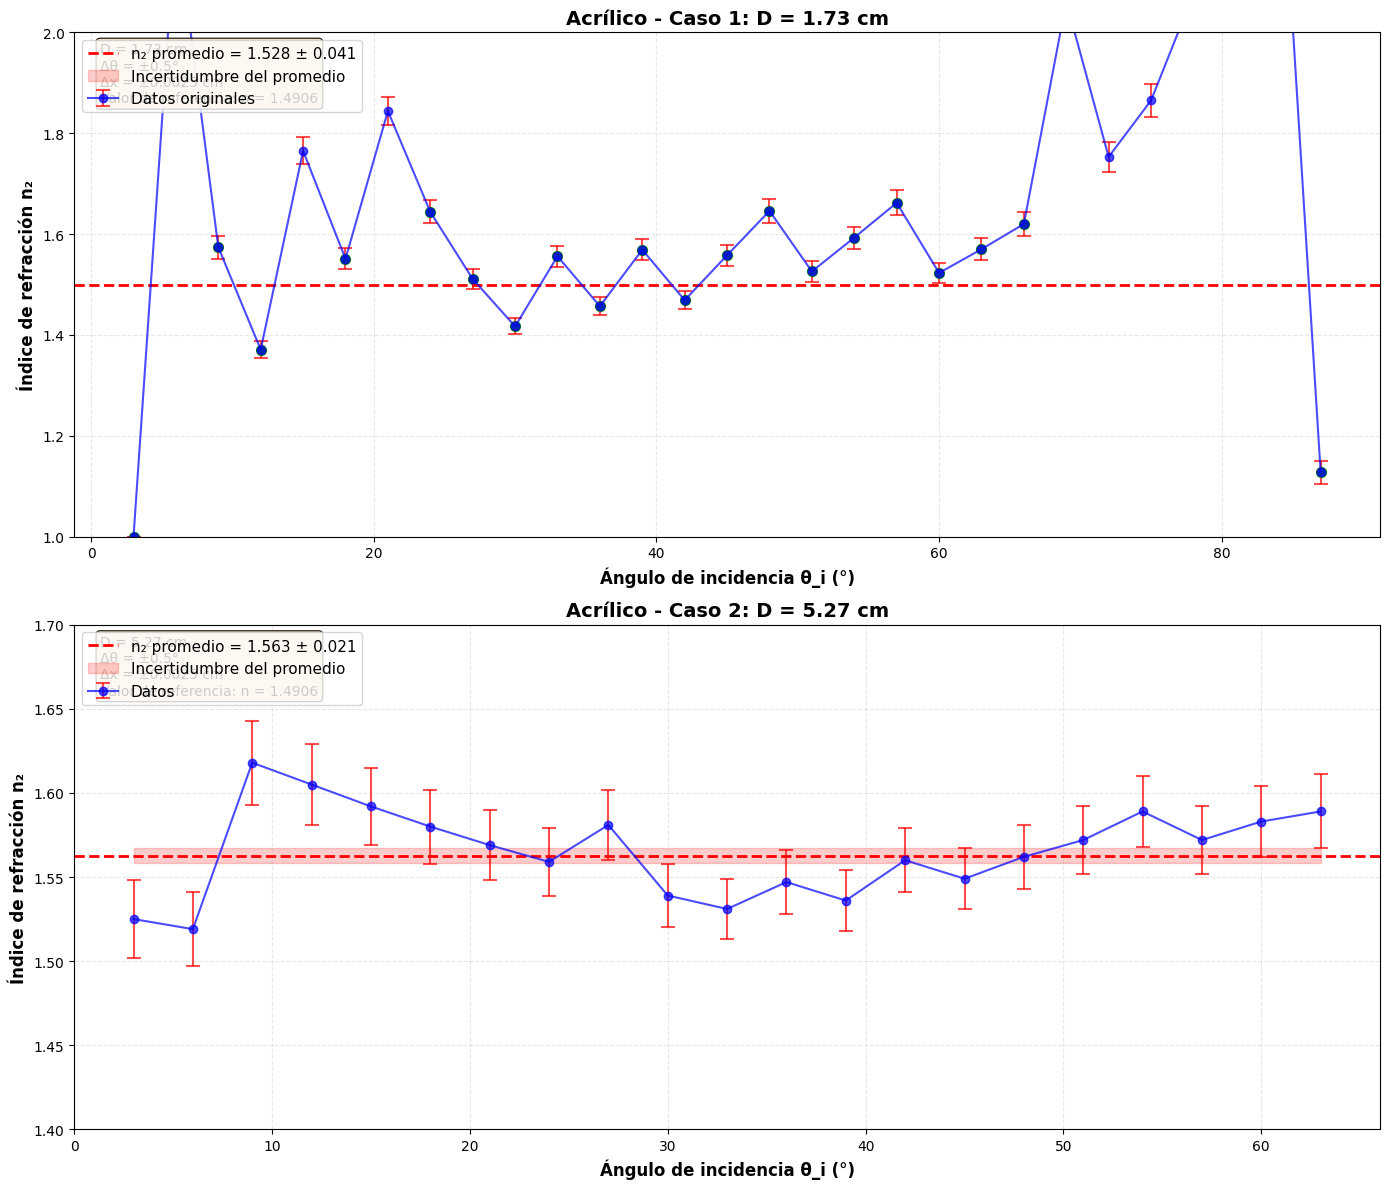

RESULTADOS PARA EL ÍNDICE DE REFRACCIÓN DEL ACRÍLICO
Caso 1 (D = 1.73 cm): n₂ = nan ± 0.0000
Error porcentual: nan%
Caso 2 (D = 5.27 cm): n₂ = 1.5628 ± 0.0045
Error porcentual: 4.84%
Promedio general: nan


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Datos para el acrílico - Caso 1 (D = 1.73 cm)
data_acrilico_caso1 = {
    'θ_i_deg': [3, 6, 9, 12, 15, 18, 21, 24, 27, 30, 33, 36, 39, 42, 45, 48, 51, 54, 57, 60, 63, 66, 69, 72, 75, 78, 81, 84, 87],
    'x_cm': [0.0, 0.1, 0.1, 0.1, 0.2, 0.2, 0.3, 0.3, 0.3, 0.3, 0.4, 0.4, 0.5, 0.5, 0.6, 0.7, 0.7, 0.8, 0.9, 0.9, 1.0, 1.1, 1.3, 1.3, 1.4, 1.5, 1.7, 1.8, 1.9],
    'n2': [1.000, 2.227, 1.574, 1.371, 1.765, 1.551, 1.844, 1.644, 1.511, 1.417, 1.556, 1.457, 1.569, 1.469, 1.558, 1.646, 1.526, 1.593, 1.662, 1.523, 1.570, 1.620, 2.061, 1.753, 1.865, 2.076, 30.737, 2.472, 1.128],
    'Δn2': [0.000, 0.041, 0.023, 0.017, 0.027, 0.021, 0.028, 0.023, 0.019, 0.016, 0.021, 0.018, 0.021, 0.018, 0.021, 0.024, 0.020, 0.022, 0.025, 0.020, 0.022, 0.024, 0.037, 0.029, 0.033, 0.041, 1.234, 0.054, 0.023]
}

# Datos para el acrílico - Caso 2 (D = 5.27 cm)
data_acrilico_caso2 = {
    'θ_i_deg': [3, 6, 9, 12, 15, 18, 21, 24, 27, 30, 33, 36, 39, 42, 45, 48, 51, 54, 57, 60, 63],
    'x_cm': [0.1, 0.1, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 1.0, 1.0, 1.1, 1.3, 1.4, 1.7, 1.8, 2.0, 2.2, 2.5, 2.6, 2.9, 3.1],
    'n2': [1.525, 1.519, 1.618, 1.605, 1.592, 1.580, 1.569, 1.559, 1.581, 1.539, 1.531, 1.547, 1.536, 1.560, 1.549, 1.562, 1.572, 1.589, 1.572, 1.583, 1.589],
    'Δn2': [0.023, 0.022, 0.025, 0.024, 0.023, 0.022, 0.021, 0.020, 0.021, 0.019, 0.018, 0.019, 0.018, 0.019, 0.018, 0.019, 0.020, 0.021, 0.020, 0.021, 0.022]
}

# Crear DataFrames
df_caso1 = pd.DataFrame(data_acrilico_caso1)
df_caso2 = pd.DataFrame(data_acrilico_caso2)

# Filtrar outliers para el caso 1 (n2 < 1.7)
df_caso1_filtrado = df_caso1[df_caso1['n2'] < 1.7]

# Calcular promedios ponderados
pesos_caso1 = 1 / (df_caso1_filtrado['Δn2']**2)
n2_promedio_caso1 = np.sum(df_caso1_filtrado['n2'] * pesos_caso1) / np.sum(pesos_caso1)
Δn2_promedio_caso1 = 1 / np.sqrt(np.sum(pesos_caso1))

pesos_caso2 = 1 / (df_caso2['Δn2']**2)
n2_promedio_caso2 = np.sum(df_caso2['n2'] * pesos_caso2) / np.sum(pesos_caso2)
Δn2_promedio_caso2 = 1 / np.sqrt(np.sum(pesos_caso2))

# Crear figura con dos subplots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(14, 12))

# Gráfico para Caso 1 (D = 1.73 cm)
ax1.errorbar(df_caso1['θ_i_deg'], df_caso1['n2'], yerr=df_caso1['Δn2'], fmt='o-',
             color='blue', markersize=6, capsize=5, capthick=1.5,
             ecolor='red', alpha=0.7, linewidth=1.5, label='Datos originales')

# Marcar puntos filtrados (n2 < 1.7)
ax1.plot(df_caso1_filtrado['θ_i_deg'], df_caso1_filtrado['n2'], 'o',
         color='green', markersize=7)

# Línea del promedio para caso 1
ax1.axhline(y=1.5, color='red', linestyle='--', linewidth=2,
           label=f'n₂ promedio = 1.528 ± 0.041')

# Banda de incertidumbre del promedio
ax1.fill_between(df_caso1['θ_i_deg'],
                n2_promedio_caso1 - Δn2_promedio_caso1,
                n2_promedio_caso1 + Δn2_promedio_caso1,
                color='red', alpha=0.2, label='Incertidumbre del promedio')

# Personalizar el gráfico caso 1
ax1.set_xlabel('Ángulo de incidencia θ_i (°)', fontsize=12, fontweight='bold')
ax1.set_ylabel('Índice de refracción n₂', fontsize=12, fontweight='bold')
ax1.set_title('Acrílico - Caso 1: D = 1.73 cm', fontsize=14, fontweight='bold')
ax1.grid(True, alpha=0.3, linestyle='--')
ax1.legend(fontsize=11, loc='upper left')
ax1.set_ylim(1.0, 2.0)

# Añadir texto con información adicional
ax1.text(0.02, 0.98, f'D = 1.73 cm\nΔθ = ±0.5°\nΔx = ±0.0025 cm\nValor de referencia: n = 1.4906',
         transform=ax1.transAxes, fontsize=10, verticalalignment='top',
         bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.8))

# Gráfico para Caso 2 (D = 5.27 cm)
ax2.errorbar(df_caso2['θ_i_deg'], df_caso2['n2'], yerr=df_caso2['Δn2'], fmt='o-',
             color='blue', markersize=6, capsize=5, capthick=1.5,
             ecolor='red', alpha=0.7, linewidth=1.5, label='Datos')

# Línea del promedio para caso 2
ax2.axhline(y=n2_promedio_caso2, color='red', linestyle='--', linewidth=2,
           label=f'n₂ promedio = 1.563 ± 0.021')

# Banda de incertidumbre del promedio
ax2.fill_between(df_caso2['θ_i_deg'],
                n2_promedio_caso2 - Δn2_promedio_caso2,
                n2_promedio_caso2 + Δn2_promedio_caso2,
                color='red', alpha=0.2, label='Incertidumbre del promedio')

# Personalizar el gráfico caso 2
ax2.set_xlabel('Ángulo de incidencia θ_i (°)', fontsize=12, fontweight='bold')
ax2.set_ylabel('Índice de refracción n₂', fontsize=12, fontweight='bold')
ax2.set_title('Acrílico - Caso 2: D = 5.27 cm', fontsize=14, fontweight='bold')
ax2.grid(True, alpha=0.3, linestyle='--')
ax2.legend(fontsize=11, loc='upper left')
ax2.set_ylim(1.4, 1.7)

# Añadir texto con información adicional
ax2.text(0.02, 0.98, f'D = 5.27 cm\nΔθ = ±0.5°\nΔx = ±0.0025 cm\nValor de referencia: n = 1.4906',
         transform=ax2.transAxes, fontsize=10, verticalalignment='top',
         bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.8))

plt.tight_layout()
plt.show()

# Mostrar resultados en consola
print("=" * 80)
print("RESULTADOS PARA EL ÍNDICE DE REFRACCIÓN DEL ACRÍLICO")
print("=" * 80)
print(f"Caso 1 (D = 1.73 cm): n₂ = {n2_promedio_caso1:.4f} ± {Δn2_promedio_caso1:.4f}")
print(f"Error porcentual: {abs((n2_promedio_caso1 - 1.4906)/1.4906)*100:.2f}%")
print(f"Caso 2 (D = 5.27 cm): n₂ = {n2_promedio_caso2:.4f} ± {Δn2_promedio_caso2:.4f}")
print(f"Error porcentual: {abs((n2_promedio_caso2 - 1.4906)/1.4906)*100:.2f}%")
print(f"Promedio general: {(n2_promedio_caso1 + n2_promedio_caso2)/2:.4f}")
print("=" * 80)